In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('data/linear_reg.csv')
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
print(X, y)

[1567 3345 3722 2783 2949 3569 2127 3102 4383 2233 4645 1483 1797 4066
 3999 2925 1227 1411 2781 2832 1222 2734 4154 1009 2797 4591 1450 1422
 3949 2350 4079 2057 3008 2245 1699 2932 4827 1047 1196 2058 3848 4440
 1370 2056 3925 1132 1574 2331 2705 4651 1310 1185 2633 3959 4345 1846
 3331 4978 4774 4858 4796 3397 4830 1033 3569 3010 2959 1404 1620 1716
 2361 4761 4558 2842 4913 2245 1127 4645 4726 2289 1077 3312 2910 2407
 2581 4488 3236 4823 1293 4260 2921 1663 4920 2218 1560 1126 1751 4239
 2683 3541 4972 4082 1611 4064 3172 1849 3927 1749 3682 3154 3387 4507
 1337 1184 1773 3123 3970 2660 1991 3124 2775 4145 1166 3097 3422 4369
 1037 4044 1423 3125 1228 1657 1283 1399 4227 2531 4682 4998 2239 3056
 1233 2589 2639 1312 1349 3742 4583 2944 4494 1511 4475 2659 3752 3766
 1743 4467 2389 4513 3125 1732 2111 3385 2930 3619 3756 2376 1795 1472
 3808 4493 1511 1700 4463 1895 4253 3741 2313 2327 3237 3234 4556 2011
 3255 4517 4061 3646 2724 2916 2718 1255 4617 4200 3705 2752 1425 1673
 1197 

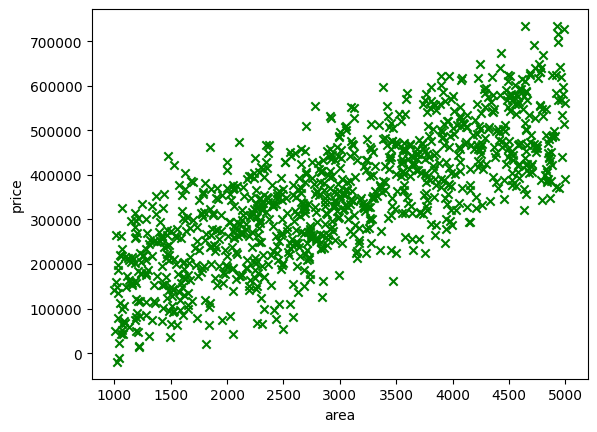

In [32]:
plt.scatter(X, y, color='green', marker='x')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [33]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

In [34]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.dot(X.transpose(), (predictions - y))
        theta -= (learning_rate / m) * errors
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

Optimized Theta [bias, weight]: [348116.99167639 108948.37349843]


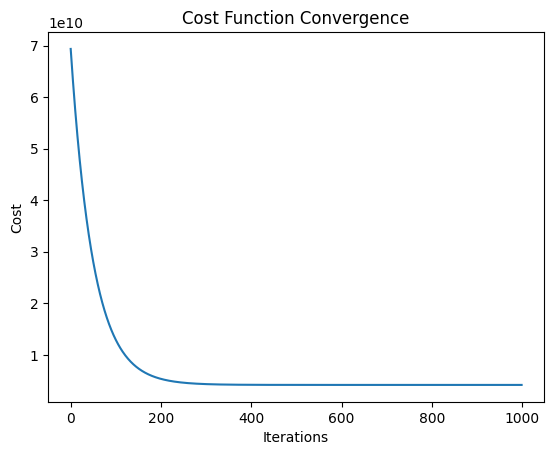

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# Feature scaling using TRAINING data only
X_mean = X_train.mean()
X_std = X_train.std()
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

# Add bias column
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

w = np.zeros(2)
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_scaled, y_train, w, learning_rate, iterations)
print("Optimized Theta [bias, weight]:", theta)
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

In [36]:
def predict(x, w, b):
    return np.dot(w,x) + b

In [37]:
def error(y_true, y_pred):
    return (y_true - y_pred) ** 2

Mean Squared Error: 8311940857.30


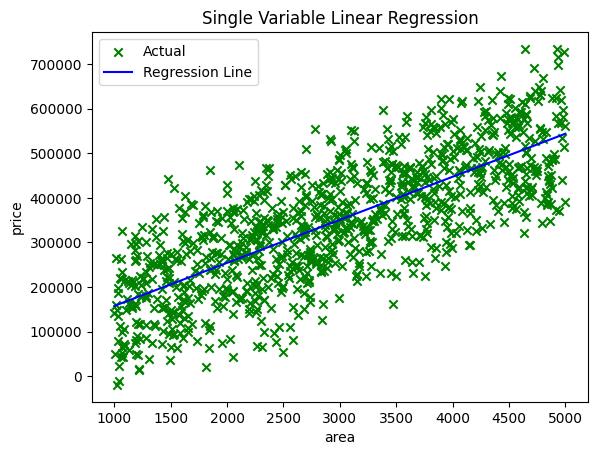

In [ ]:
# Predict on test set
y_test_pred = [predict(X_test_scaled[i, 1], theta[1], theta[0]) for i in range(len(X_test))]
y_test_pred = np.array(y_test_pred)

# Plot: training data + test data + regression line
plt.scatter(X_train, y_train, color='green', marker='x', label='Train')
plt.scatter(X_test, y_test, color='orange', marker='o', label='Test (actual)')
plt.scatter(X_test, y_test_pred, color='red', marker='s', label='Test (predicted)')
x_line = np.linspace(X.min(), X.max(), 100)
x_line_scaled = (x_line - X_mean) / X_std
y_line = theta[0] + theta[1] * x_line_scaled
plt.plot(x_line, y_line, color='blue', label='Regression Line')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Linear Regression: Train/Test Split')
plt.legend()
plt.show()

In [ ]:
# Evaluate on TEST set
mse = np.mean((y_test - y_test_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_test_pred))
ss_res = np.sum((y_test - y_test_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print("=== Test Set Evaluation ===")
print(f"MSE  (Mean Squared Error):            {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):        {rmse:.2f}")
print(f"MAE  (Mean Absolute Error):            {mae:.2f}")
print(f"R²   (Coefficient of Determination):   {r_squared:.4f}")

MSE  (Mean Squared Error):            8311940857.30
RMSE (Root Mean Squared Error):        91169.85
MAE  (Mean Absolute Error):            75091.14
R²   (Coefficient of Determination):   0.5882


In [40]:
Area = input("Enter area to predict price: ")
Area_scaled = (float(Area) - X_mean) / X_std
predicted_price = theta[0] + theta[1] * Area_scaled
print(f"Predicted price for area {Area}: {predicted_price:.2f}")

Predicted price for area 1252: 181886.67
